<a href="https://colab.research.google.com/github/sahilfaizal01/Multi-Disease-Prediction-App/blob/main/Diabetes_Prediction_Using_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING THE LIBRARIES**

In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# **DATA COLLECTION AND ANALYSIS**

In [2]:
df = pd.read_csv('/content/diabetes.csv') 

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## 0 -> Non-Diabetic
## 1 -> Diabetic

In [9]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### It can be seen that the avg age of a non-diabetic person is 31 and that of a diabetic person is 37.
### The BMI of a non-diabetic person is 30 and diabetic person is 35.
### Also the glucose and insulin levels are higher for the diabetic person.

In [10]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [11]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [12]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [28]:
df.iloc[:,:-1].corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.0,0.1295,0.1413,-0.08167,-0.07353,0.01768,-0.03352,0.5443
Glucose,0.1295,1.0,0.1526,0.05733,0.3314,0.2211,0.1373,0.2635
BloodPressure,0.1413,0.1526,1.0,0.2074,0.08893,0.2818,0.04126,0.2395
SkinThickness,-0.08167,0.05733,0.2074,1.0,0.4368,0.3926,0.1839,-0.114
Insulin,-0.07353,0.3314,0.08893,0.4368,1.0,0.1979,0.1851,-0.04216
BMI,0.01768,0.2211,0.2818,0.3926,0.1979,1.0,0.1406,0.03624
DiabetesPedigreeFunction,-0.03352,0.1373,0.04126,0.1839,0.1851,0.1406,1.0,0.03356
Age,0.5443,0.2635,0.2395,-0.114,-0.04216,0.03624,0.03356,1.0


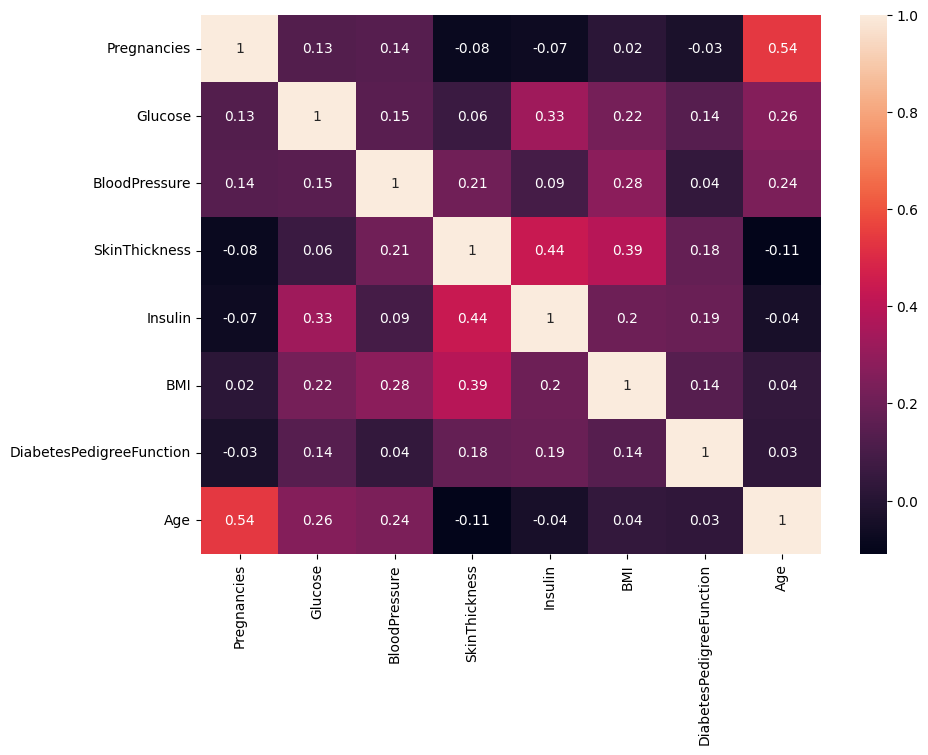

In [33]:
f, ax = plt.subplots(figsize=(10, 7))
matrix = df.iloc[:,:-1].corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

# SCALING

In [13]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

In [14]:
X = standardized_data

# SPLITTING THE DATASET

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state=2)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


# TRAIN THE CLASSIFIER

## **SVM**

In [20]:
classifier = svm.SVC(kernel='linear')

In [21]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

## **LOGISTIC REGRESSION**

In [35]:
reg = LogisticRegression()
reg.fit(X_train, Y_train)

LogisticRegression()

## **RANDOM FOREST**

In [37]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

## **XGBOOST**

In [38]:
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## **DECISION TREES**

In [39]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

# MODEL EVALUATION

## **SVM**

In [22]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [23]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [24]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [25]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


In [41]:
print(classification_report(X_test_prediction,Y_test))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       117
           1       0.52      0.76      0.62        37

    accuracy                           0.77       154
   macro avg       0.71      0.77      0.73       154
weighted avg       0.82      0.77      0.79       154



In [76]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

<Axes: xlabel='Predicted', ylabel='Actual'>

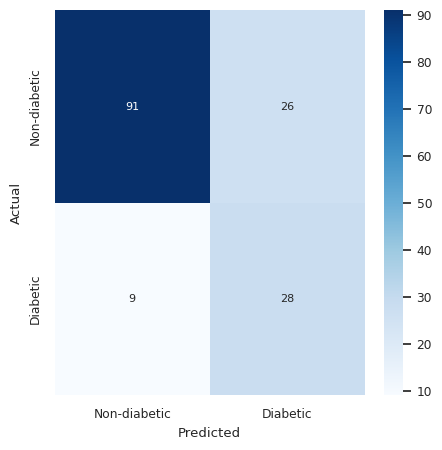

In [49]:
data = confusion_matrix(X_test_prediction,Y_test)
clm = ['Non-diabetic','Diabetic']
df_cm = pd.DataFrame(data, columns=clm, index = clm)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=0.8)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 8})# font size

## **LOGISTIC REGRESSION**

In [50]:
lr_train_pred = reg.predict(X_train)
lr_train_acc = accuracy_score(lr_train_pred, Y_train)
print('Accuracy score of the training data : ', lr_train_acc)
lr_test_pred = reg.predict(X_test)
lr_test_acc = accuracy_score(lr_test_pred, Y_test)
print('Accuracy score of the training data : ', lr_test_acc)

Accuracy score of the training data :  0.7850162866449512
Accuracy score of the training data :  0.7597402597402597


In [52]:
print(classification_report(lr_test_pred,Y_test))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83       115
           1       0.52      0.72      0.60        39

    accuracy                           0.76       154
   macro avg       0.70      0.75      0.72       154
weighted avg       0.80      0.76      0.77       154



## **RANDOM FOREST**

In [53]:
rf_train_pred = rf.predict(X_train)
rf_train_acc = accuracy_score(rf_train_pred, Y_train)
print('Accuracy score of the training data : ', rf_train_acc)
rf_test_pred = rf.predict(X_test)
rf_test_acc = accuracy_score(rf_test_pred, Y_test)
print('Accuracy score of the training data : ', rf_test_acc)

Accuracy score of the training data :  1.0
Accuracy score of the training data :  0.7402597402597403


In [54]:
print(classification_report(rf_test_pred,Y_test))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       110
           1       0.54      0.66      0.59        44

    accuracy                           0.74       154
   macro avg       0.69      0.72      0.70       154
weighted avg       0.76      0.74      0.75       154



## **XGBOOST**

In [55]:
xgb_train_pred = xgb.predict(X_train)
xgb_train_acc = accuracy_score(xgb_train_pred, Y_train)
print('Accuracy score of the training data : ', xgb_train_acc)
xgb_test_pred = xgb.predict(X_test)
xgb_test_acc = accuracy_score(xgb_test_pred, Y_test)
print('Accuracy score of the training data : ', xgb_test_acc)

Accuracy score of the training data :  1.0
Accuracy score of the training data :  0.7532467532467533


In [56]:
print(classification_report(xgb_test_pred,Y_test))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       108
           1       0.57      0.67      0.62        46

    accuracy                           0.75       154
   macro avg       0.71      0.73      0.72       154
weighted avg       0.77      0.75      0.76       154



## **DECISION TREES**

In [57]:
dt_train_pred = dt.predict(X_train)
dt_train_acc = accuracy_score(dt_train_pred, Y_train)
print('Accuracy score of the training data : ', dt_train_acc)
dt_test_pred = dt.predict(X_test)
dt_test_acc = accuracy_score(dt_test_pred, Y_test)
print('Accuracy score of the training data : ', dt_test_acc)

Accuracy score of the training data :  1.0
Accuracy score of the training data :  0.7077922077922078


In [58]:
print(classification_report(dt_test_pred,Y_test))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       107
           1       0.52      0.60      0.55        47

    accuracy                           0.71       154
   macro avg       0.66      0.68      0.67       154
weighted avg       0.72      0.71      0.71       154



### **The SVM model is seen as the best classifier with minimal trend of overfitting**

# **DATA-BALANCING USING SMOTE**

In [59]:
from imblearn.over_sampling import SMOTE
from collections import Counter
counter = Counter(y)
print('Before Upsampling:',counter)
oversample = SMOTE()
Xm, ym = oversample.fit_resample(X, y)
# summarize the new class distribution
counterm = Counter(ym)
print('After Upsampling:',counterm)

Before Upsampling: Counter({0: 500, 1: 268})
After Upsampling: Counter({1: 500, 0: 500})


In [71]:
Xm_train, Xm_test, Ym_train, Ym_test = train_test_split(Xm,ym, test_size = 0.20, stratify=ym, random_state=2)

In [72]:
classifier1 = svm.SVC(kernel='linear')
classifier1.fit(Xm_train, Ym_train)
classifier1_train_pred = classifier1.predict(Xm_train)
classifier1_train_acc = accuracy_score(classifier1_train_pred, Ym_train)
print('Accuracy score of the training data : ', classifier1_train_acc)
classifier1_test_pred = classifier1.predict(Xm_test)
classifier1_test_acc = accuracy_score(classifier1_test_pred, Ym_test)
print('Accuracy score of the testing data : ', classifier1_test_acc)

Accuracy score of the training data :  0.7425
Accuracy score of the testing data :  0.81


In [73]:
lr1 = LogisticRegression()
lr1.fit(Xm_train, Ym_train)
lr1_train_pred = lr1.predict(Xm_train)
lr1_train_acc = accuracy_score(lr1_train_pred, Ym_train)
print('Accuracy score of the training data : ', lr1_train_acc)
lr1_test_pred = lr1.predict(Xm_test)
lr1_test_acc = accuracy_score(lr1_test_pred, Ym_test)
print('Accuracy score of the testing data : ', lr1_test_acc)

Accuracy score of the training data :  0.73375
Accuracy score of the testing data :  0.805


In [74]:
rf1 = RandomForestClassifier()
rf1.fit(Xm_train, Ym_train)
rf1_train_pred = rf1.predict(Xm_train)
rf1_train_acc = accuracy_score(rf1_train_pred, Ym_train)
print('Accuracy score of the training data : ', rf1_train_acc)
rf1_test_pred = rf1.predict(Xm_test)
rf1_test_acc = accuracy_score(rf1_test_pred, Ym_test)
print('Accuracy score of the testing data : ', rf1_test_acc)

Accuracy score of the training data :  1.0
Accuracy score of the testing data :  0.83


# **MAKING A PREDICTIVE SYSTEM**

In [75]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
